In [1]:
import numpy as np
import os
import glob
import seaborn as sns

In [2]:
fc_only_baseline = [0.303938489322368, 0.3093833789899899, 0.30591501256690773]
full_model_baseline = [0.4243540602566276, 0.4274145287715402, 0.42345384894634636]

In [3]:
fc_only_results = {0: {1: 0.12566471177609206,
  2: 0.1647873842473217,
  3: 0.16019018325134254,
  4: 0.15784904774401828,
  5: 0.14319607804204895,
  6: 0.16323147087577017,
  7: 0.13900931630018876,
  8: 0.1666123977618358,
  9: 0.17142070211346172,
  10: 0.17521368748782357,
  11: 0.1897644526447548},
 1: {1: 0.128077341496854,
  2: 0.1563530354432886,
  3: 0.15620128503875821,
  4: 0.14879247434643703,
  5: 0.1393481996769682,
  6: 0.14218285483776774,
  7: 0.13139365072408943,
  8: 0.15342667145954111,
  9: 0.1572712177826516,
  10: 0.17504515113215752,
  11: 0.17780279074768604},
 2: {1: 0.1137792364142563,
  2: 0.1663257130724236,
  3: 0.17699919104957346,
  4: 0.14259340262057157,
  5: 0.1587097415129478,
  6: 0.1404819869242055,
  7: 0.13896763261105718,
  8: 0.15722643945899098,
  9: 0.16610890440179626,
  10: 0.17226367902502862,
  11: 0.19119348947204767}}

In [4]:
full_model_results = {0: {1: 0.1837950956654363,
  2: 0.19671473705687795,
  3: 0.20108673916061362,
  4: 0.22839356873791183,
  5: 0.24803364962186142,
  6: 0.2801172312563643,
  7: 0.27110793890395973,
  8: 0.3110693194328128,
  9: 0.316840358987352,
  10: 0.3215811625128609,
  11: 0.3271420230040678},
 1: {1: 0.22985252242840487,
  2: 0.19597478469046467,
  3: 0.21783907609314937,
  4: 0.23930789814136008,
  5: 0.26865411317923715,
  6: 0.28090549465691333,
  7: 0.288099491039961,
  8: 0.29758997141753923,
  9: 0.31679773694370217,
  10: 0.35268393548779886,
  11: 0.3378161897150029},
 2: {1: 0.20279004818311505,
  2: 0.1887408070434549,
  3: 0.21838904490771974,
  4: 0.2158818242469624,
  5: 0.27319212312492397,
  6: 0.28078952116189515,
  7: 0.28692273536359414,
  8: 0.3179243595785271,
  9: 0.3185604812317797,
  10: 0.3533927597841378,
  11: 0.3262227478317309}}

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame()

In [7]:
layers = []
model_type = []
# fc_only = []
# full_model = []
eval_map = []

In [8]:
for key, values in fc_only_results.items():
    for k, v in values.items():
        # print(k, v)
        layers.append(k)
        eval_map.append(v)
        model_type.append("fc-only")

In [9]:
for key, values in full_model_results.items():
    for k, v in values.items():
        # print(k, v)
        layers.append(k)
        eval_map.append(v)
        model_type.append("full")

In [10]:
df = pd.DataFrame()
df['Layer'] = layers
df['model_type'] = model_type
df['eval mAP'] = eval_map

In [11]:
# df = df.melt("Layer", var_name='', value_name='eval mAP')

In [12]:
df

,Layer,model_type,eval mAP
0,1,fc-only,0.125665
1,2,fc-only,0.164787
2,3,fc-only,0.160190
3,4,fc-only,0.157849
4,5,fc-only,0.143196
...,...,...,...
61,7,full,0.286923
62,8,full,0.317924
63,9,full,0.318560
64,10,full,0.353393


In [13]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [14]:
m_fconly, h_fconly = mean_confidence_interval(fc_only_baseline)
m_full, h_full = mean_confidence_interval(full_model_baseline)

In [15]:
m_fconly

0.3064122936264219

In [16]:
m_full

0.42507414599150467

In [17]:
def check_stuff(model_type, layer):
    e = df[df['model_type'] == model_type]
    ee = e[e['Layer'] == layer]['eval mAP'].values
    m, h = mean_confidence_interval(ee)
    print(m-h, m+h, h)

In [18]:
check_stuff("fc-only", 1)

0.10349299752175128 0.1415211956030503 0.0190140990406495


In [19]:
check_stuff("fc-only", 10)

0.1700587500615537 0.17828959503511943 0.004115422486782877


In [20]:
check_stuff("fullmodel", 1)
check_stuff("fullmodel", 10)

nan nan nan
nan nan nan


/home/user/miniconda3/envs/asr-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/miniconda3/envs/asr-env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/user/miniconda3/envs/asr-env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/user/miniconda3/envs/asr-env/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/user/miniconda3/envs/asr-env/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/user/miniconda

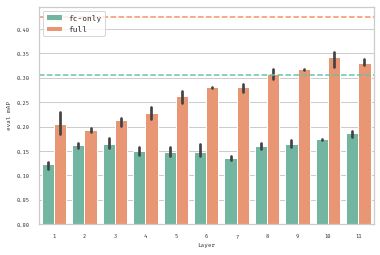

In [24]:
sns.set_theme(style="whitegrid", palette="Set2", font='Fira Mono', font_scale=0.5)
colours = sns.color_palette("Set2", 2)
ax = sns.barplot(x='Layer', y='eval mAP', hue='model_type', data=df)
ax.axhline(m_fconly, ls='--', color=colours[0])
ax.axhline(m_full, ls='--', color=colours[1])
ax.legend(loc="upper left", fontsize=8)
# ax.set_title()
ax.figure.savefig("/home/user/Desktop/residual_study_final_ci95_Set2.png", dpi=300, bbox_inches='tight')

In [26]:
full_model_results

{0: {1: 0.21898723119808686,
  2: 0.2075165284444755,
  3: 0.2169938626862424,
  4: 0.2232939336995754,
  5: 0.25147119901573556,
  6: 0.27084707045355466,
  7: 0.27310423734162564,
  8: 0.3126478078935492,
  9: 0.31253935617985484,
  10: 0.3534935464858034,
  11: 0.3164541589543721},
 1: {1: 0.20279019417143068,
  2: 0.1887409128019601,
  3: 0.218389029058707,
  4: 0.21588182855252783,
  5: 0.2731924953485707,
  6: 0.28078951784075024,
  7: 0.2869227432117307,
  8: 0.3179237894104235,
  9: 0.31856046389383297,
  10: 0.35339297857886776,
  11: 0.32622267499727897},
 2: {1: 0.2027902043942639,
  2: 0.18874082072217657,
  3: 0.21838904765631778,
  4: 0.21588182177965315,
  5: 0.27319210499699387,
  6: 0.2807895966538768,
  7: 0.28692272700338456,
  8: 0.3179240756365327,
  9: 0.3185604942406386,
  10: 0.3533927547218073,
  11: 0.32622271382760926}}